# SUPERSTORE MARKETING CAMPAIGN DATASET

## About Dataset

**Context-** A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only 499(dollar)  which is 999(dollar)  on other days. It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.


**Objective-** The superstore wants to predict the likelihood of the customer giving a positive response and wants to identify the different factors which affect the customer's response. You need to analyze the data provided to identify these factors and then build a prediction model to predict the probability of a customer will give a positive response.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('superstore_data.csv')

In [3]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## FEATURES INFO

This data was gathered during last year's campaign.

Data description is as follows;


Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

ID - Unique ID of each customer

Year_Birth - Age of the customer

Complain - 1 if the customer complained in the last 2 years

Dt_Customer - date of customer's enrollment with the company

Education - customer's level of education

Marital - customer's marital status

Kidhome - number of small children in customer's household

Teenhome - number of teenagers in customer's household

Income - customer's yearly household income

MntFishProducts - the amount spent on fish products in the last 2 years

MntMeatProducts - the amount spent on meat products in the last 2 years

MntFruits - the amount spent on fruits products in the last 2 years

MntSweetProducts - amount spent on sweet products in the last 2 years

MntWines - the amount spent on wine products in the last 2 years

MntGoldProds - the amount spent on gold products in the last 2 years

NumDealsPurchases - number of purchases made with discount

NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)

NumStorePurchases - number of purchases made directly in stores

NumWebPurchases - number of purchases made through the company's website

NumWebVisitsMonth - number of visits to company's website in the last month

Recency - number of days since the last purchase

In [11]:
df.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

**As we can see that only the "income" feature has missing values and filling this feature with mean of the entire column can do damage to our predictions, hence we'll drop these 24 missing values**

In [4]:
df.dropna(inplace=True)

In [5]:
df.isna().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

In [14]:
df.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [6]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

In [7]:
df['Customer-Year']=df['Dt_Customer'].dt.year
df['Customer-Month']=df['Dt_Customer'].dt.month
df['Customer-Day']=df['Dt_Customer'].dt.day


In [9]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer-Year,Customer-Month,Customer-Day
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,4,4,6,1,1,0,2014,6,16
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,1,7,3,7,5,1,0,2014,6,15
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,1,3,2,5,2,0,0,2014,5,13
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,1,1,0,2,7,0,0,2014,11,5
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,2,3,1,2,7,1,0,2014,8,4


In [10]:
df['Year_Birth'].dtype

dtype('int64')

In [8]:
from datetime import datetime

In [9]:
current_year=datetime.now().year

In [10]:
df['age']=current_year - df['Year_Birth']

In [11]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer-Year,Customer-Month,Customer-Day,age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,4,4,6,1,1,0,2014,6,16,55
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,3,7,5,1,0,2014,6,15,64
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,3,2,5,2,0,0,2014,5,13,67
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,1,0,2,7,0,0,2014,11,5,58
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,3,1,2,7,1,0,2014,8,4,36


In [24]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Year', 'Month', 'Day', 'age'],
      dtype='object')

In [1]:
#dropping any unwanted columns

In [12]:
df.drop(columns=['NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Dt_Customer'], inplace=True)

In [13]:
df.drop(columns=['NumWebPurchases'], inplace=True)

In [14]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'Response', 'Complain', 'Customer-Year',
       'Customer-Month', 'Customer-Day', 'age'],
      dtype='object')

In [15]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,Response,Complain,Customer-Year,Customer-Month,Customer-Day,age
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,111,189,218,1,1,0,2014,6,16,55
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,7,0,37,1,1,0,2014,6,15,64
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,15,2,30,1,0,0,2014,5,13,67
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,0,0,0,1,0,0,2014,11,5,58
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,11,0,34,2,1,0,2014,8,4,36


In [21]:
#Now we have a cleansed dataset

In [2]:
#Well check the distribution of our target variable to check if theres an imbalance distribution

**Here our target variable is 'respose' which on 0 indicates 'No' and on 1 indicates 'Yes'**

In [23]:
df['Response'].value_counts(normalize=True) * 100


Response
0    84.972924
1    15.027076
Name: proportion, dtype: float64

In [3]:
#shows the imbalance between both the categories which can eventually affect modelling

What does countplot do?

It counts the number of occurrences of each category in a column and plots them as bars.


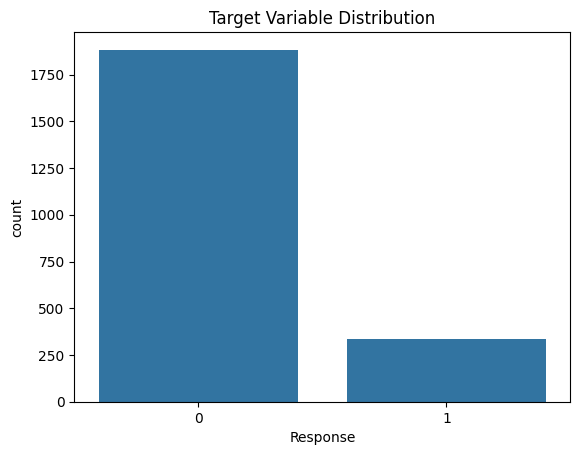

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(data=df, x='Response')
plt.title('Target Variable Distribution')
plt.show()


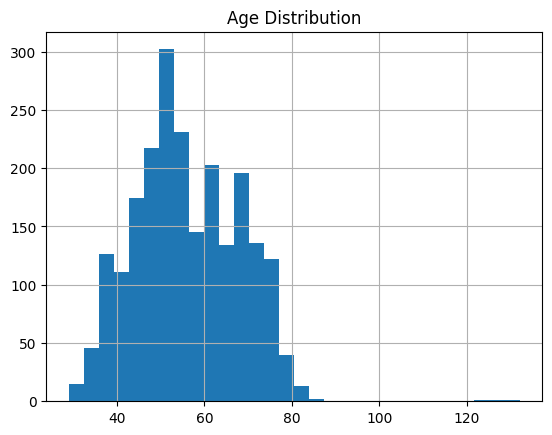

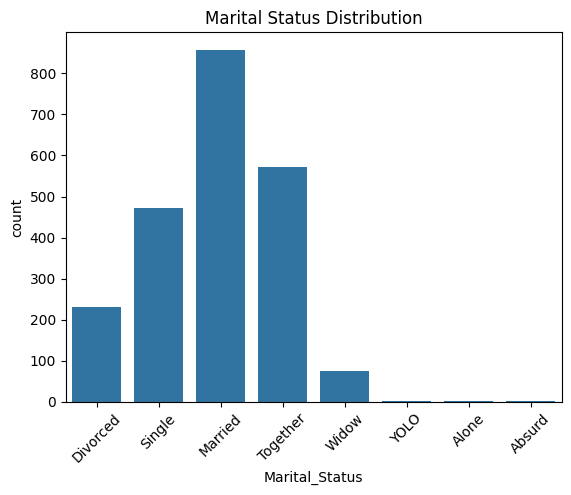

In [30]:
# Numeric
df['age'].hist(bins=30)
plt.title('Age Distribution')
plt.show()

# Categorical
sns.countplot(data=df, x='Marital_Status')
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)
plt.show()


CHecking the correlation and what variable relates with the target variable

<Axes: xlabel='Education', ylabel='count'>

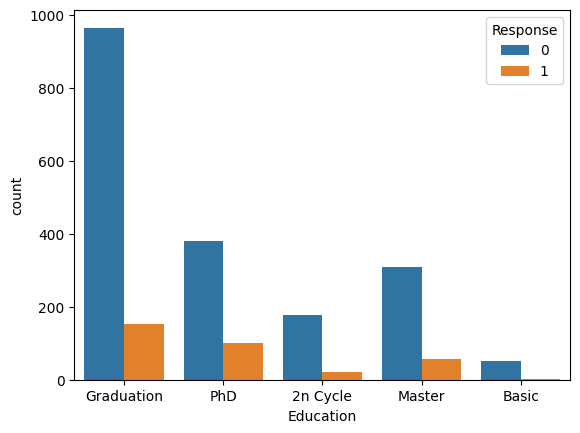

In [47]:
sns.countplot(data=df,x='Education',hue='Response')

In [4]:
# In the dataset theres majority graduated customers

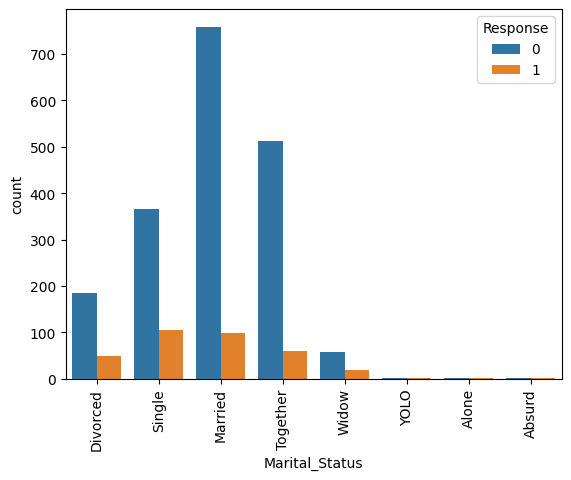

In [39]:
sns.countplot(data=df,x='Marital_Status',hue='Response')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Income'>

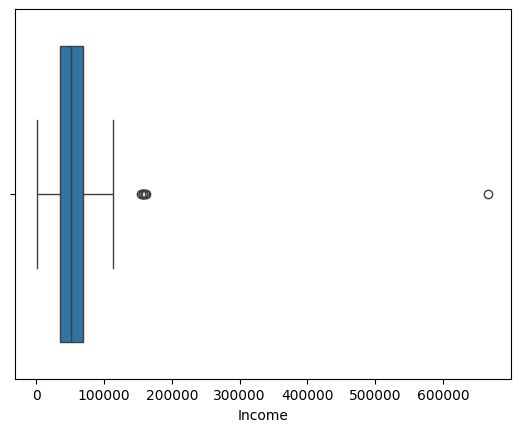

In [40]:
sns.boxplot(x=df['Income'])

In [57]:
#removing the outlier

In [41]:
df_filtered=df[df['Income']>200000]

In [42]:
df_filtered.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumWebVisitsMonth,Response,Complain,Year,Month,Day,age
527,9432,1977,Graduation,Together,666666.0,1,0,23,9,14,...,12,4,3,6,0,0,2013,2,6,48


In [43]:
df=df.drop(index=527)

<Axes: xlabel='Income'>

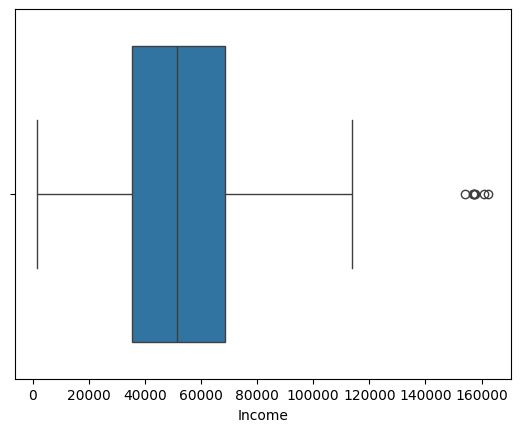

In [44]:
sns.boxplot(x=df['Income'])

In [45]:
df['Income'].describe()

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

In [5]:
df['Response']

0       1
1       1
2       0
3       0
4       1
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64

In [31]:
df[df['age']>100]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumWebVisitsMonth,Response,Complain,Year,Month,Day,age
513,11004,1893,2n Cycle,Single,60182.0,0,1,23,8,0,...,2,1,1,4,0,0,2014,5,17,132
827,1150,1899,PhD,Together,83532.0,0,0,36,755,144,...,224,1,4,1,0,0,2013,9,26,126
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,99,15,6,...,25,1,2,5,0,1,2013,9,26,125


In [5]:
#removing records where age is greater than 100 as there's a clear error in data entry maybe

In [46]:
df=df[df['age']<=100]

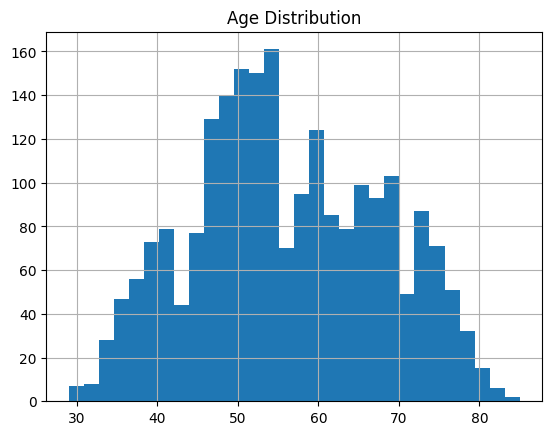

In [47]:
df['age'].hist(bins=30)
plt.title('Age Distribution')
plt.show()

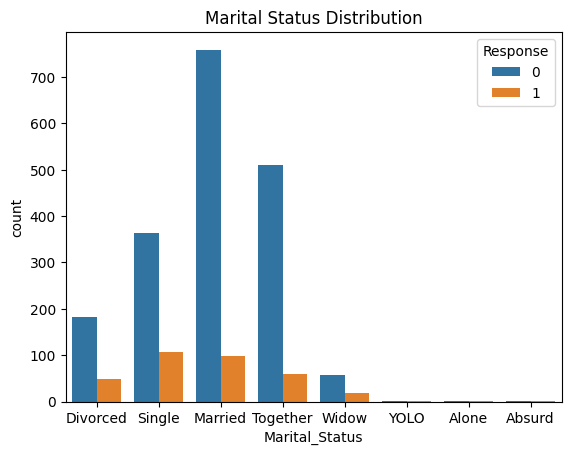

In [49]:
sns.countplot(data=df, x='Marital_Status', hue='Response')
plt.title('Marital Status Distribution')
plt.show()

In [51]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Response',
       'Complain', 'Year', 'Month', 'Day', 'age'],
      dtype='object')


**UPTIL NOW**

**1- Handled missing values by dropping the missing values in income feature**

**2- Derived new columns like year month day from the column Dt_customer which was the date a customer registered**

**3- Dropped unnecessary columns**

**4- Derived age columns using birth_year**

**5- Visulized the distributions to get an idea of my features and target variable also visualized different possible features against target variable**

**6- Removed outliers from income and age columns**

### We'll segment the income column into three categories like high medium low

In [52]:
df['Income'].describe()

count      2212.000000
mean      51958.810579
std       21527.278844
min        1730.000000
25%       35233.500000
50%       51371.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

In [54]:
percentiles= df['Income'].quantile([0.25,0.50,0.75])

In [55]:
percentiles[0.25]

35233.5

In [56]:
def income_cat(x):
    if x <= percentiles[0.25]:
        return "Low Wage Earner"
    
    if x <= percentiles[0.50]:
        return "Medium Wage Earner"
    
    else:
        return "High Wage Earner"

In [57]:
df['Wage-Earner']=df['Income'].apply(income_cat)

In [58]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumWebVisitsMonth,Response,Complain,Year,Month,Day,age,Wage-Earner
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,1,4,1,1,0,2014,6,16,55,High Wage Earner
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,1,7,5,1,0,2014,6,15,64,High Wage Earner
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,1,3,2,0,0,2014,5,13,67,High Wage Earner
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,1,1,7,0,0,2014,11,5,58,Low Wage Earner
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,2,3,7,1,0,2014,8,4,36,Low Wage Earner


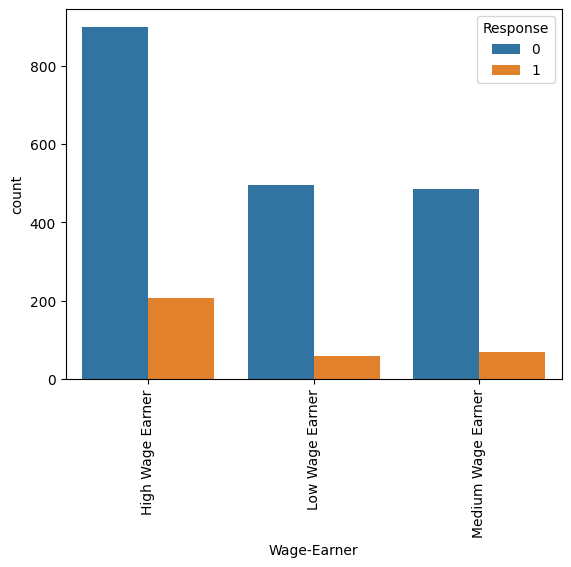

In [59]:
sns.countplot(data=df, x='Wage-Earner', hue='Response')
plt.xticks(rotation=90)
plt.show()

In [60]:
# There is no such pattern that we can find here

In [62]:
# Total counts per income group
group_total = df.groupby('Wage-Earner')['Response'].count()

# Total 'yes' (response = 1) per group
group_yes = df[df['Response'] == 1].groupby('Wage-Earner')['Response'].count()

# Calculate percentage of positive responses
response_rate = (group_yes / group_total) * 100
print(response_rate)


Wage-Earner
High Wage Earner      18.625678
Low Wage Earner       10.488246
Medium Wage Earner    12.477396
Name: Response, dtype: float64


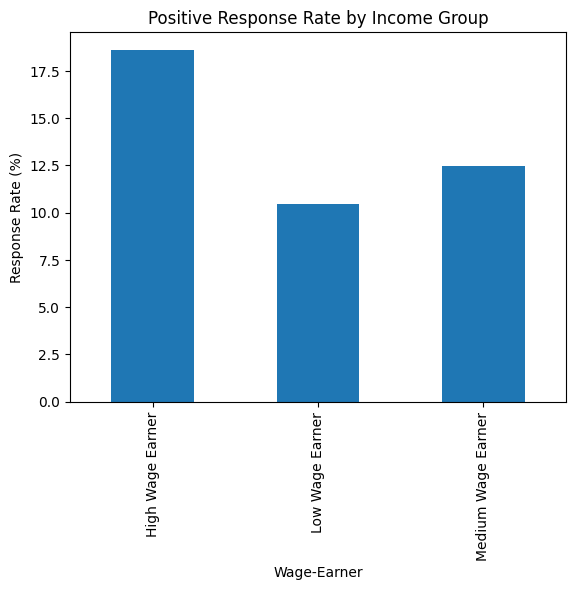

In [63]:
response_rate.plot(kind='bar', title='Positive Response Rate by Income Group', ylabel='Response Rate (%)')
plt.show()


In [66]:
# Now this makes much more sense showing some pattern that high wage earners are more likely to have a positive response
# not only because there are more of them but because theres a higher proportion of yes

In [68]:
bins = [0, 30, 50, 120]  # 0–30: Young, 31–50: Middle-aged, 51+: Older
labels = ['Young', 'Middle-aged', 'Older']

df['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels)


In [69]:
age_response = df.groupby('Age_Group')['Response'].value_counts(normalize=True).unstack().fillna(0)
age_response['Response Rate (%)'] = age_response[1] * 100
age_response


C:\Users\AMC\AppData\Local\Temp\ipykernel_10244\3342221591.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_response = df.groupby('Age_Group')['Response'].value_counts(normalize=True).unstack().fillna(0)


Response,0,1,Response Rate (%)
Age_Group,,,
Young,0.714286,0.285714,28.571429
Middle-aged,0.845550,0.154450,15.445026
Older,0.852186,0.147814,14.781402


C:\Users\AMC\AppData\Local\Temp\ipykernel_10244\2396818351.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_response.index, y=age_response['Response Rate (%)'], palette='coolwarm')


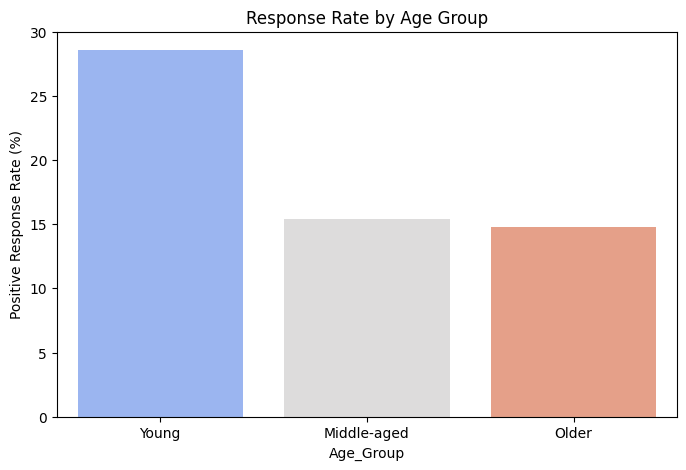

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x=age_response.index, y=age_response['Response Rate (%)'], palette='coolwarm')
plt.ylabel('Positive Response Rate (%)')
plt.title('Response Rate by Age Group')
plt.show()


In [71]:
# Didn't expected it but younger people have much higher positive response

# WHY

Are younger customers more price-sensitive and thus more attracted by discounts?

Do they respond better to phone calls or digital engagement?

Are older customers less interested in memberships or less reachable?

In [74]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Response',
       'Complain', 'Year', 'Month', 'Day', 'age', 'Wage-Earner', 'Age_Group'],
      dtype='object')

Tomorrow we'll have to see which columns to drop which to keep which to encode etc


❌Numofdealspurchased mei i can work on like the people who have higher number of deals purchased have higher chance of availing this offer

✔️people who have the highest amount of purchase of goldproducts can also have higher chance

✔️Also look at divorced single and married people and see the differnce of results between them



In [24]:
df[['Id','MntGoldProds']]

,Id,MntGoldProds
0,1826,218
1,1,37
2,10476,30
3,1386,0
4,5371,34
...,...,...
2235,10142,78
2236,5263,16
2237,22,14
2238,528,63


In [33]:
df['MntGoldProds'].idxmax()

14

In [38]:
df.loc[df['MntGoldProds'].idxmax(), 'Id']


10311

In [40]:
df[df['Id']==10311]['MntGoldProds']

14    321
Name: MntGoldProds, dtype: int64

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='MntGoldProds'>

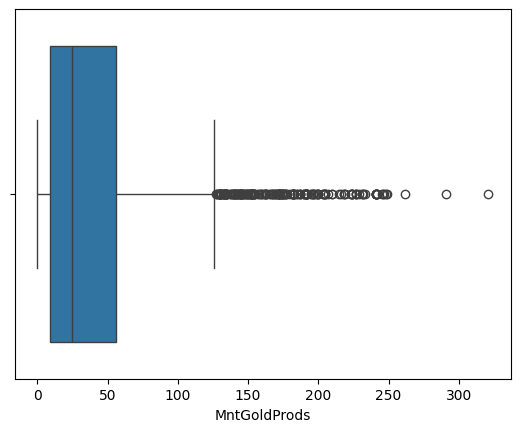

In [42]:
sns.boxplot(x=df['MntGoldProds'])

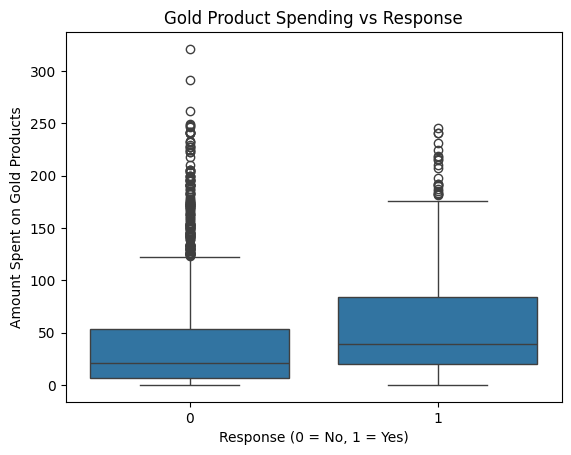

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Response', y='MntGoldProds', data=df)
plt.title("Gold Product Spending vs Response")
plt.xlabel("Response (0 = No, 1 = Yes)")
plt.ylabel("Amount Spent on Gold Products")
plt.show()


In [44]:
df.groupby('Response')['MntGoldProds'].mean()


Response
0    40.908125
1    61.252252
Name: MntGoldProds, dtype: float64

In [ ]:
# Suggests that on an average people who spend more on gold products on an average  have a positve reponse

In [45]:
from scipy.stats import ttest_ind

responded = df[df['Response'] == 1]['MntGoldProds']
not_responded = df[df['Response'] == 0]['MntGoldProds']

t_stat, p_value = ttest_ind(responded, not_responded, equal_var=False)
print(f"T-stat: {t_stat}, P-value: {p_value}")


T-stat: 6.063058322110388, P-value: 2.9459295601958363e-09


As our p-value is very much small this suggests that there is a strong statistical difference of mean between people who spend more on gold products and who spend less which supports our hypothesis that people are more likely to have a positive response if they spend more on gold products

In [46]:
df.columns

Index(['Id', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'Response', 'Complain', 'Customer-Year',
       'Customer-Month', 'Customer-Day', 'age'],
      dtype='object')

In [48]:
df[['NumDealsPurchases']].idxmax()

NumDealsPurchases    497
dtype: int64

In [49]:
df.loc[df['NumDealsPurchases'].idxmax(), 'Id']

1501

In [51]:
df[df['Id']==1501]['NumDealsPurchases']

497    15
Name: NumDealsPurchases, dtype: int64

In [52]:
df.groupby('Response')['NumDealsPurchases'].mean()

Response
0    2.320765
1    2.339339
Name: NumDealsPurchases, dtype: float64

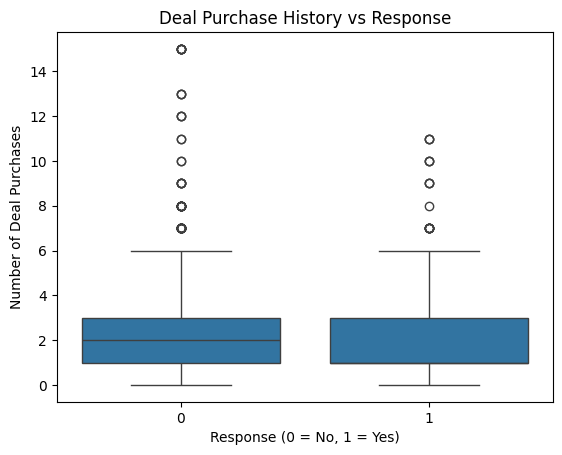

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Response', y='NumDealsPurchases', data=df)
plt.title("Deal Purchase History vs Response")
plt.xlabel("Response (0 = No, 1 = Yes)")
plt.ylabel("Number of Deal Purchases")
plt.show()


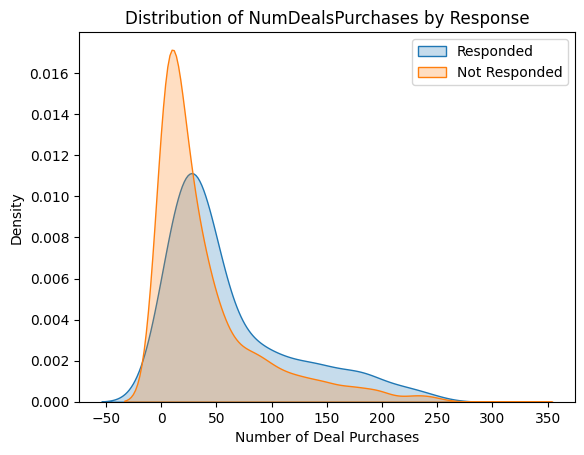

In [54]:
sns.kdeplot(responded, label='Responded', fill=True)
sns.kdeplot(not_responded, label='Not Responded', fill=True)
plt.title("Distribution of NumDealsPurchases by Response")
plt.xlabel("Number of Deal Purchases")
plt.legend()
plt.show()


In [55]:
from scipy.stats import ttest_ind

responded = df[df['Response'] == 1]['NumDealsPurchases']
not_responded = df[df['Response'] == 0]['NumDealsPurchases']

t_stat, p_value = ttest_ind(responded, not_responded, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 0.15022561949906657, P-value: 0.8806568759861049


The p-value suggests that there is no significant difference between the two groups although intuitively it made sense but the data says that customers have a postive/negative response regardless of whether they have a history of deals purchases or not.


In [56]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

In [31]:
# Define the categories you want to keep
valid_categories = ['Married', 'Divorced','Together','Single','Widow']

# Filter the DataFrame to keep only the valid categories
df = df[df['Marital_Status'].isin(valid_categories)]

# Optionally, check the result
print(df['Marital_Status'].value_counts())


Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Name: count, dtype: int64


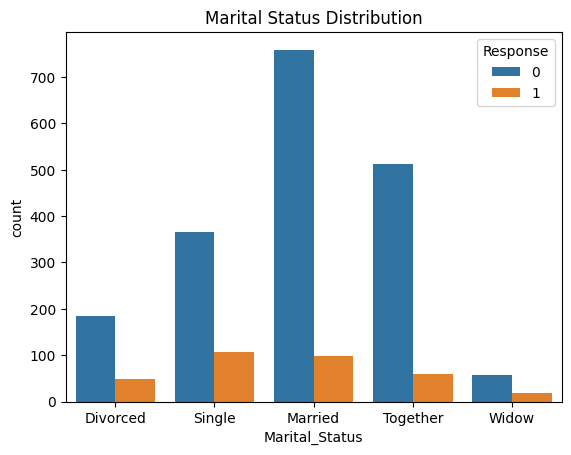

In [34]:
sns.countplot(data=df, x='Marital_Status', hue='Response')
plt.title('Marital Status Distribution')
plt.show()

In [35]:
# Group by 'MaritalStatus' and calculate the response rate
response_rate_by_marital_status = df.groupby('Marital_Status')['Response'].mean()

# Display the results
print(response_rate_by_marital_status)


Marital_Status
Divorced    0.206897
Married     0.114352
Single      0.225053
Together    0.104712
Widow       0.236842
Name: Response, dtype: float64


In [36]:
marital_status_resp = df.groupby('Marital_Status')['Response'].value_counts(normalize=True).unstack().fillna(0)
marital_status_resp['Response Rate (%)'] = marital_status_resp[1] * 100
marital_status_resp


Response,0,1,Response Rate (%)
Marital_Status,,,
Divorced,0.793103,0.206897,20.689655
Married,0.885648,0.114352,11.435239
Single,0.774947,0.225053,22.505308
Together,0.895288,0.104712,10.471204
Widow,0.763158,0.236842,23.684211


C:\Users\AMC\AppData\Local\Temp\ipykernel_21160\37767104.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marital_status_resp .index, y=marital_status_resp ['Response Rate (%)'], palette='coolwarm')


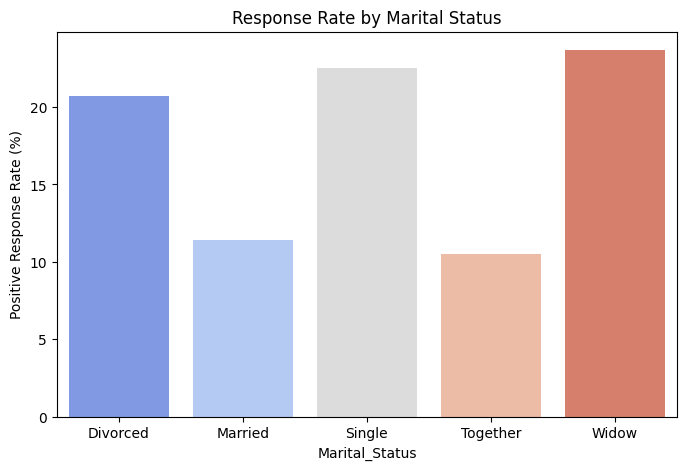

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(x=marital_status_resp .index, y=marital_status_resp ['Response Rate (%)'], palette='coolwarm')
plt.ylabel('Positive Response Rate (%)')
plt.title('Response Rate by Marital Status')
plt.show()


In [65]:
df.columns

Index(['Id', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'Response', 'Complain', 'Customer-Year',
       'Customer-Month', 'Customer-Day', 'age'],
      dtype='object')

In [66]:
df.head()

,Id,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,Response,Complain,Customer-Year,Customer-Month,Customer-Day,age
0,1826,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,1,0,2014,6,16,55
1,1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,1,0,2014,6,15,64
2,10476,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,0,0,2014,5,13,67
3,1386,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,0,0,2014,11,5,58
4,5371,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,1,0,2014,8,4,36


In [70]:
df['MntGoldProds'].corr(df['Response'])

0.1382288509040106

In [71]:
df['Income'].corr(df['Response'])

0.13336943860011807

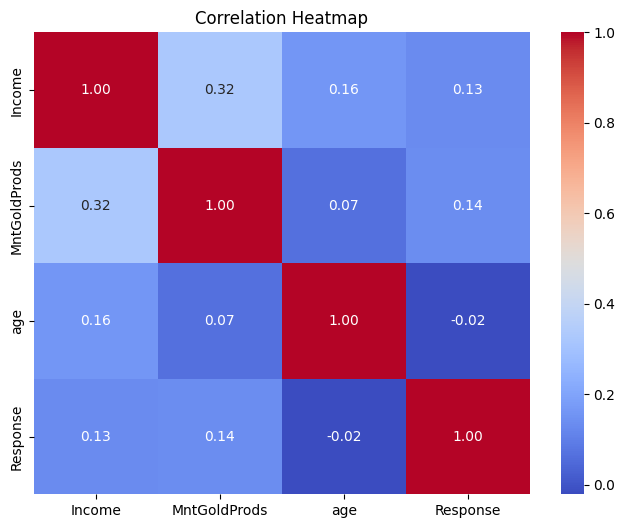

In [76]:
# Example for correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix (including numerical columns)
correlation_matrix = df[['Income', 'MntGoldProds', 'age', 'Response']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [38]:
df.to_csv('Data&AI EDA.csv',index=False)

## ENCODING VARIABLES

In [39]:
df_encoded = pd.get_dummies(df, drop_first=True, dtype=int)

In [40]:
df_encoded  = df_encoded.drop(columns=['MntWines','MntMeatProducts','MntFishProducts','MntSweetProducts'])

In [41]:
df_encoded.corr().style.background_gradient(cmap='coolwarm')

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntFruits,MntGoldProds,NumDealsPurchases,Response,Complain,Customer-Year,Customer-Month,Customer-Day,age,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
Id,1.000000,0.002051,0.012813,0.003145,-0.003299,-0.045601,0.006430,-0.012286,-0.038887,-0.025876,0.034147,-0.003666,0.030605,-0.038694,-0.002051,-0.009522,0.023306,-0.027953,0.003008,0.010401,-0.016458,0.006596,0.022535
Year_Birth,0.002051,1.000000,-0.162133,0.234546,-0.350909,-0.015254,-0.018665,-0.066772,-0.058573,0.020911,-0.030345,-0.026209,0.004718,-0.001764,-1.000000,0.114416,0.066810,-0.066836,-0.123074,0.050710,0.120204,-0.052294,-0.158254
Income,0.012813,-0.162133,1.000000,-0.428536,0.019784,-0.004836,0.430193,0.324924,-0.082837,0.133369,-0.027228,0.023600,-0.014564,-0.031338,0.162133,-0.200679,0.018787,0.010838,0.082936,-0.016402,-0.025801,0.023528,0.031751
Kidhome,0.003145,0.234546,-0.428536,1.000000,-0.040409,0.011355,-0.372988,-0.354442,0.217484,-0.077590,0.041026,0.050701,0.001345,-0.008277,-0.234546,0.055370,-0.002019,0.012778,-0.043397,0.017913,0.014201,0.009295,-0.072068
Teenhome,-0.003299,-0.350909,0.019784,-0.040409,1.000000,0.015036,-0.175045,-0.017352,0.385967,-0.155693,0.003349,-0.008297,0.004903,-0.000900,0.350909,-0.120022,-0.022959,0.023818,0.089920,0.008601,-0.099422,0.025654,0.048398
Recency,-0.045601,-0.015254,-0.004836,0.011355,0.015036,1.000000,-0.007422,0.016852,0.004858,-0.199654,0.013444,-0.028031,-0.002783,0.018368,0.015254,-0.003455,0.028947,-0.026744,-0.005483,-0.021063,0.002222,0.018679,-0.001783
MntFruits,0.006430,-0.018665,0.430193,-0.372988,-0.175045,-0.007422,1.000000,0.394237,-0.133275,0.122294,-0.005329,-0.054632,-0.000406,-0.021914,0.018665,-0.060643,0.113149,-0.056392,-0.080499,-0.014129,0.011856,-0.012702,0.026155
MntGoldProds,-0.012286,-0.066772,0.324924,-0.354442,-0.017352,0.016852,0.394237,1.000000,0.053308,0.138229,-0.031053,-0.143115,0.017476,0.002359,0.066772,-0.064407,0.130697,-0.034319,-0.116573,-0.015405,-0.005438,-0.007386,0.043899
NumDealsPurchases,-0.038887,-0.058573,-0.082837,0.217484,0.385967,0.004858,-0.133275,0.053308,1.000000,0.003653,0.000699,-0.185380,-0.004539,-0.001281,0.058573,-0.043073,-0.004254,0.022222,0.008135,0.026134,-0.050880,0.002614,0.003500
Response,-0.025876,0.020911,0.133369,-0.077590,-0.155693,-0.199654,0.122294,0.138229,0.003653,1.000000,-0.001795,-0.171432,0.019854,-0.009265,-0.020911,-0.049892,-0.039164,0.006072,0.085094,-0.078252,0.110497,-0.074173,0.046309


In [42]:
df_encoded.head()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntFruits,MntGoldProds,NumDealsPurchases,Response,...,Customer-Day,age,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1826,1970,84835.0,0,0,0,104,218,1,1,...,16,55,0,1,0,0,0,0,0,0
1,1,1961,57091.0,0,0,0,5,37,1,1,...,15,64,0,1,0,0,0,1,0,0
2,10476,1958,67267.0,0,1,0,11,30,1,0,...,13,67,0,1,0,0,1,0,0,0
3,1386,1967,32474.0,1,1,0,0,0,1,0,...,5,58,0,1,0,0,0,0,1,0
4,5371,1989,21474.0,1,0,0,16,34,2,1,...,4,36,0,1,0,0,0,1,0,0


In [43]:
df_encoded.columns

Index(['Id', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntFruits', 'MntGoldProds', 'NumDealsPurchases', 'Response',
       'Complain', 'Customer-Year', 'Customer-Month', 'Customer-Day', 'age',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow'],
      dtype='object')

## TRAIN TEST SPLIT

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


In [46]:
X=df_encoded.drop(columns=['Response','Id']) # Removing target variable and id
y=df_encoded['Response'] # Only the target variable

In [47]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [48]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
model=LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [50]:
y_pred=model.predict(X_test_scaled)

In [51]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8438914027149321


In [52]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[358  13]
 [ 56  15]]


In [53]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       371
           1       0.54      0.21      0.30        71

    accuracy                           0.84       442
   macro avg       0.70      0.59      0.61       442
weighted avg       0.81      0.84      0.81       442



In [25]:
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/5e/03/15cd49e855c62226ecf1831bbe4c8e73a4324856077a23c495538a36e557/xgboost-3.0.0-py3-none-win_amd64.whl.metadata
  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 4.5 MB/s eta 0:00:34
   ---------------------------------------- 0.1/150.0 MB 1.7 MB/s eta 0:01:28
   ---------------------------------------- 0.2/150.0 MB 1.2 MB/s eta 0:02:02
   ---------------------------------------- 0.2/150.0 MB 1.1 MB/s eta 0:02:20
   ---------------------------------------- 0.2/150.0 MB 919.0 kB/s eta 0:02:43
   ---------------------------------------- 0.2/150.0 MB 885.4 kB/s eta 0:02:50
   ---------------------------------------- 0.3/150.0 MB 785.2 kB/s eta 0:03:11
   ----------------------------

In [26]:
import xgboost

from sklearn.model_selection import GridSearchCV , StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [55]:
model_xg = xgboost.XGBClassifier(random_state=42)

model_xg.fit(X_train_scaled ,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [58]:
y_train_hat  = model_xg.predict(X_train_scaled)

y_test_hat = model_xg.predict(X_test_scaled)

print("------------------------for the train dataset------------------------------\n")
print(classification_report(y_train , y_train_hat))

print("------------------------for the test dataset--------------------------------\n")
print(classification_report(y_test , y_test_hat))

print("------------------------for the train dataset-------------------------------\n")
print(roc_auc_score(y_train , y_train_hat))

print("------------------------for the test dataset---------------------------------\n")
print(roc_auc_score(y_test , y_test_hat))

------------------------for the train dataset------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1508
           1       0.98      0.98      0.98       259

    accuracy                           0.99      1767
   macro avg       0.99      0.99      0.99      1767
weighted avg       0.99      0.99      0.99      1767

------------------------for the test dataset--------------------------------

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       371
           1       0.54      0.39      0.46        71

    accuracy                           0.85       442
   macro avg       0.71      0.66      0.68       442
weighted avg       0.83      0.85      0.84       442

------------------------for the train dataset-------------------------------

0.9870907284700389
------------------------for the test dataset---------------------------------

0.6648380851144

I used XGBoost for classification and achieved high accuracy (99%) on training data and 85% on test data. However, the model shows signs of overfitting and underperforms in identifying positive responses (Class 1), likely due to class imbalance. Further tuning or balancing techniques (like SMOTE, class weights, or undersampling) could improve performance.



# INSIGHTS:

**1- HIGH WAGE EARNER ARE MORE LIKELY TO HAVE A POSITIVE RESPONSE**

**2- YOUNGER PEOPLE (AGED BETWEEN 0-30) HAVE A HIGHER POSITIVE RESPONSE THAN OTHER WHICH WAS UNEXPECTED TO ME**

**3- CUSTOMERS WHO SPEND MORE ON GOLD PRODUCTS ON AN AVERAGE HAVE HIGHER CHANCE OF A POSITIVE RESPONSE.**

**4- WIDOWS HAVE THE HIGHTES RESPONSE RATE AMONG OTHERS IN MARITAL STATUS**

**5- SINGLE AND DIVORCED CUSTOMERS HAVE ALSO RELATIVELY HIGHER RESPONSE RATE**

# IMPORTANT FEATURES

**1-Marital_Status**

**2-Income**

**3-MntGoldProds** 

**4-NumDealsPurchases** 

**5-age**



**Target Vriable:Response**